# Life Expectancy (WHO)
## Statistical Analysis on factors influencing Life Expectancy

<a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who">Dataset Kaggle : Life Expectancy (WHO)</a>

Le data-set est composé de données récoltées par le Global Health Observatory sous la direction de l'OMS. Les données sont récoltées dans l'objectif de suivre le niveau de la santé mondiale ainsi que les facteurs liés pour tous les pays. 

Le data-set lié à l'espérance de vie est composé de facteurs santé recensés pour 193 pays obtenus sur le site de l'OMS, les données économiques sont récoltées sur le site des Nations Unies. 

Ce data-set a l'avantage de proposer plusieurs angles d'approche. Dans mon cas je vais m'intéresser à deux problématiques :
- Quels sont les effets de la couverture vaccinale sur l'espérance de vie ?
- Comment l'espérance de vie et la couverture vaccinale sont-elles influencées par les dépenses du gouvernements sur la santé ?

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

### Importation des données

In [24]:
data_dirty=pd.read_csv('Life Expectancy Data.csv')

### Data Cleaning
Pour pouvoir nettoyer le dataset il faut comprendre les variables avec lesquelles on travaille. Les critères à prendre en compte pour les variables sont :
- Qu'est ce que la variable représente et de quel type est-elle ?
- Est-ce que la variable a des valeurs manquantes ? Si oui comment les traiter ?
- Est-ce que la variable a des outlier ? Si oui comment les traiter ?

#### Description du data-set, description des variables
##### Description du data-set

In [3]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
data.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [5]:
data.shape

(2938, 22)

Le data-set est une aggregation de données réalisée par l'OMS, il regroupe de nombreux indicateurs estimés pour un pays et pour une année. <br/>
Le nom des colonnes/variables n'est pas homogène, on va donc effectuer un nettoyage.

In [56]:
# Je choisis de renommer de manière homogène 
# Leur nom sera en minuscule et que les espaces seront remplacés par des underscore

cols_old = list(data.columns)
cols_new = []
for col in cols_old:
    cols_new.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data_dirty.columns = cols_new

# Il faut renommer la colonne pour qu'elle corresponde à la variable qu'elle contient

data_clean=data_dirty.rename(columns = {'thinness_1-19_years':'thinness_10-19_years'})

data_clean["year"] = pd.to_datetime(data_clean["year"],format='%Y')

data_clean["status"] = data_clean["status"].astype('category')
data_clean["country"] = data_clean["country"].astype('category')

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          2938 non-null   category      
 1   year                             2938 non-null   datetime64[ns]
 2   status                           2938 non-null   category      
 3   life_expectancy                  2928 non-null   float64       
 4   adult_mortality                  2928 non-null   float64       
 5   infant_deaths                    2938 non-null   int64         
 6   alcohol                          2744 non-null   float64       
 7   percentage_expenditure           2938 non-null   float64       
 8   hepatitis_b                      2385 non-null   float64       
 9   measles                          2938 non-null   int64         
 10  bmi                              2904 non-null   float64    

##### Description des variables
Le data-set est composé de 2938 observations sur 22 variables de suivi.<br/>
Les 22 variables de suivi sont :
- ```country``` : pays d'origine des variables de suivi, variable qualitative nominale
- ```year``` : année de mesure des variables de suivi, variable quantitative de type date
- ```status```: status de développement du pays selon l'OMS, développé/en développement, variable qualitative ordinale
- ```adult_mortality```: taux de mortalité des adultes pour 1000 individus, variable quantitative de ratio
- ```infant_death```: taux de mortalité infantile pour 1000, variable quantitative de ratio
- ```alcohol```: consommation d'alcool du pays en litre d'alcool pur <i>per capita</i>, variable quantitative de ratio
- ```percentage_expenditure```: dépense du pays sur la santé en pourcentage du PIB, variable quantitative de ratio
- ```hepatitis_b```: couverture vaccinale à l'hépatite B chez les moins de 1 an, variable quantitative de ratio
- ```measles```: nombre de cas reportés de rougeole pour 1000, variable quantitative de ratio
- ```bmi```: IMC mmoyen de la population totale du pays
- ```under-five_death```: taux de mortalité des individus de moins de 5 ans pour 1000, variable quantitative de ratio
- ```polio```: couverture vaccinale à la polio chez les moins de 1 an, variable quantitative de ratio
- ```total_expenditure``` : dépense du gouvernement sur la santé en pourcentage des dépenses totales du gouvernement, variable quantitative de ratio
- ```diphteria```: couverture vaccinale antidiphtérique-antitétanique-anticoquelucheux (DTC3) chez les moins de 1 an, variable quantitative de ratio
- ```hiv\aids```: mortalité causée par le VIH/SIDA chez les individus de moins de 5 ans pour 1000, variable quantitative de ratio
- ```gpd```: Produit Intérieur Brut <i>per capita</i>, variable quantitative de ratio
- ```population```: population du pays, variable quantitative
- ```thinness_10-19_years```: taux d'individus en sous-poids chez les individus âgés de 10 à 19 ans, variable quantitative de ratio
- ```thinness_5-9_years```: taux d'individus en sous-poids chez les individus âgés de 5 à 9 ans, variable quantitative de ratio
- ```income_composition_of_resources``` : Indice de Développement Humain (IDH) en termes de composition des ressources, variable quantitative de ratio
- ```schooling```: nombre d'années moyen de scolarisation de la population, variable quantitative de ratio

<b>REPONSE</b>
- ```life_expectancy```: espérance de vie des individus en années pour un individu donné dans un pays donné à une année donnée, variable quantitative

Les variables ```country```et ```year```sont des variables de regroupement, elles ne seront pas utilisées dans les analyses

Les variables prédictives peuvent être divisées en plusieurs catégories : facteurs liés à l'immunité, facteurs liés à la mortalité, facteurs économiques, facteurs sociaux.

#### Valeurs manquantes et outliers

In [66]:
data_clean.describe().iloc[:, 1:]

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2515.000000,2090.000000,2744.000000,2938.000000,2385.000000,2938.000000,1482.000000,2153.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,189.326044,42.599522,4.602861,738.251295,80.940461,2419.592240,29.056208,57.362285,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,117.092132,137.941420,4.052413,1987.914858,25.070016,11467.272489,11.978755,185.077201,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,32.000000,1.000000,0.010000,0.000000,1.000000,0.000000,11.200000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,98.000000,2.000000,0.877500,4.685343,77.000000,0.000000,18.400000,3.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,162.000000,9.000000,3.755000,64.912906,92.000000,17.000000,25.700000,11.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,248.500000,33.000000,7.702500,441.534144,97.000000,360.250000,41.550000,46.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,49.900000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Avec un simple tableau descriptif des variables on peut remarques des incohérences :
- Un taux de mortalité de 1 est très probablement une erreur.
- Un taux de mortalité infantile de 0 est très proprablement également une erreur.
- Un taux de mortalité chez les moins de 5 ans de 0 est très probablement également une erreur.
- Des IMC de 1 et de 87.3 sont impossibles car absolument pas réalistes en fonction de ce que la variable représente.
- Une population de 34 individus est improbable.

Afin d'étudier ces valeurs abherrantes on utilise les boxplot.

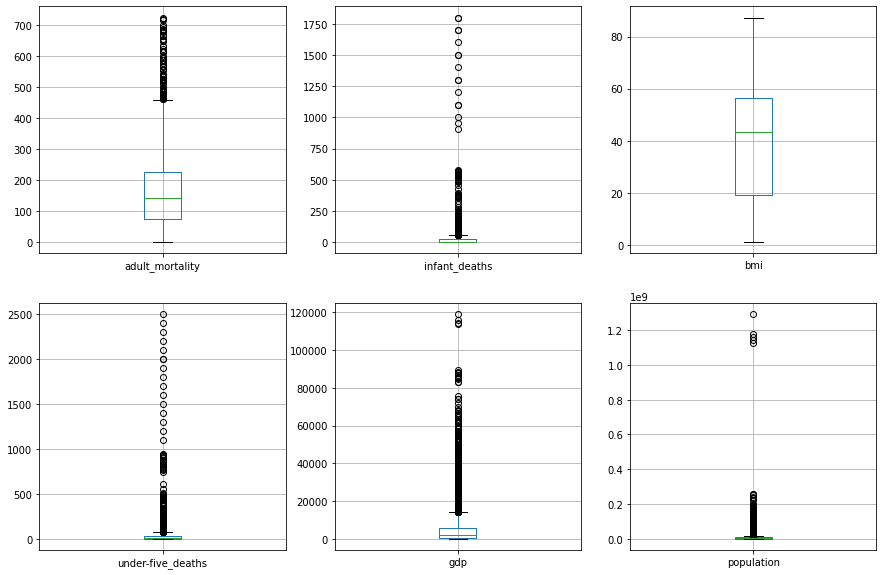

In [58]:
#Affichages des boxplots sur les variables présentant des valeurs abherrantes
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    data_clean.boxplot(col)

Pour certaines erreurs, on va considérer que ce sont des valeurs abherrantes et donc on va les transformer en NaN pour qu'elles ne polluent pas l'information.
- La mortalité infantile ne doit pas etre nulle
- La mortalité des individus inférieurs à 5 ans ne doit pas être nulle
- L'IMC ne doit pas etre inférieur à 10 et supérieur à 50

In [101]:
# Supression des valeurs nulles des mortalités
data_clean.infant_deaths = data_clean.infant_deaths.replace(0, np.nan)
data_clean['under-five_deaths'] = data_clean['under-five_deaths'].replace(0, np.nan)

# Supression des valeurs abherrantes sur l'IMC
data_clean.bmi = data_clean.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)

Pour la mortalité des adultes, on va considérer que le taux de mortalité ne doit pas être inférieur au 5ème percentile.

In [87]:
# Calcul de la valeur du 5ème percentile de la mortalité adulte
mort_5_percentile = np.percentile(data_clean.adult_mortality.dropna(), 5)
# Filtrage des données
data_clean.adult_mortality = data_clean.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)

data_clean.describe().iloc[:, 1:]

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2258.000000,2090.000000,2744.000000,2938.000000,2385.000000,2938.000000,1482.000000,2153.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,204.764393,42.599522,4.602861,738.251295,80.940461,2419.592240,29.056208,57.362285,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,113.677070,137.941420,4.052413,1987.914858,25.070016,11467.272489,11.978755,185.077201,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,69.000000,1.000000,0.010000,0.000000,1.000000,0.000000,11.200000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,126.000000,2.000000,0.877500,4.685343,77.000000,0.000000,18.400000,3.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,174.000000,9.000000,3.755000,64.912906,92.000000,17.000000,25.700000,11.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,262.000000,33.000000,7.702500,441.534144,97.000000,360.250000,41.550000,46.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,49.900000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [88]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          2938 non-null   category      
 1   year                             2938 non-null   datetime64[ns]
 2   status                           2938 non-null   category      
 3   life_expectancy                  2928 non-null   float64       
 4   adult_mortality                  2258 non-null   float64       
 5   infant_deaths                    2090 non-null   float64       
 6   alcohol                          2744 non-null   float64       
 7   percentage_expenditure           2938 non-null   float64       
 8   hepatitis_b                      2385 non-null   float64       
 9   measles                          2938 non-null   int64         
 10  bmi                              1482 non-null   float64    

In [99]:
data_quanti=data_clean.drop(['country','year','status'], axis='columns')

# Calcul du pourcentage de valeurs manquantes par variable
data_quanti.isna().sum()/data_quanti.isna().count()*100

life_expectancy                     0.340368
adult_mortality                    23.144997
infant_deaths                      28.863172
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                49.557522
under-five_deaths                  26.718856
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_10-19_years                1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: float64

Avec près de 50% de valeurs manquantes la variable ```bmi``` ne représente pas d'intérêt d'étude.

In [102]:
data_clean.drop(columns='bmi', inplace=True)